# Analysis 

> **WORK IN PROGRESS** Please note that the analysis in this notebook is subject to change as the review evolves.

This notebook contains the Python script that analyses the data extracted from the STRESS review.

## 1. Imports

### 1.1 Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional

# use gglot style for all matplotlib
plt.style.use("ggplot")

### 1.2 Review pipeline imports

In [2]:
from data_pipeline import load_review_dataset, filter_to_application_studies

## 2. Constants

In [3]:
# N/A

## 3. Utility functions

Some simple functions repeatedly used for plotting or analysing datasets.

In [4]:
# | code-fold: true
def frequency_bar_chart(
    data: pd.DataFrame,
    x_label: str,
    y_label: Optional[str] = "Frequency",
    rotate_x_ticks: Optional[int] = 0,
    figsize: Optional[int | int] = (12, 6),
):
    """
    Create bar chart of the selected categorical variable.
    Returns matplotlib figure and axis.

    Parameters:
    ---------
    data: pd.DataFrame
       Frequency dataset for bar chart

    x_label: str
        Label to display on x-axis

    y_label: str, optional (default = "Frequency")
        Label to display on y-axis

    rotate_x_ticks: int, optional (default = 0)
        Degress to rotate the x axis text (0 for no rotation)

    figsize: Tuple(int, int), optional (default=(12,6)
        The size of the matplotlib picture.

    Returns:
    -------
    out: fig and axis of plot
    """

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    ax = data.plot(kind="bar", ax=ax)

    _ = ax.set_xlabel(x_label)
    _ = ax.set_ylabel(y_label)

    # Add data labels on the bars
    _ = ax.bar_label(ax.containers[0], label_type="edge", padding=3)

    # rotate x axis text
    _ = plt.xticks(rotation=rotate_x_ticks)

    return fig, ax

## 4. Read and clean review data

In [5]:
clean_review = load_review_dataset()

In [6]:
# rows and columns n's
clean_review.shape

(165, 25)

## 5. Filter to empirical studies only 

Here we separate the studies that have used the STRESS guidelines in second dataframe i.e. limit to studies that have used STRESS for documenting a model. This is stored in a notebook level variable called `empirical_studies`

> **Reminder**: Filtering is done using the 'used' field.  Details are available in the [filtering notebook](./02_filtering)

In [7]:
empirical_studies = filter_to_application_studies(clean_review)

In [8]:
# number of studies that used STRESS as intended i.e. to document
empirical_studies.shape

(73, 25)

## 6. Results

### Year of publication


::: {.callout-note collapse="true"}
## TM notes for additional analysis

* **TM Query (1)**: 2024 obviously partial, as it will take us a while to do this study we should update again in 2025 to get all 2024 papers if we can

*  **TM Query (2)**: WE should prob show no. citations OVERALL by year as well
:::


In [9]:
def figure_1(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """
    Create bar chart of publications by year (ordered)

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    # The frequency of papers that have used STRESS guidelines
    # based on the publication year
    year_freq = data["year"].value_counts(dropna=False).sort_index(ascending=True)

    return frequency_bar_chart(
        data=year_freq, x_label="Year", y_label="Publications"
    )

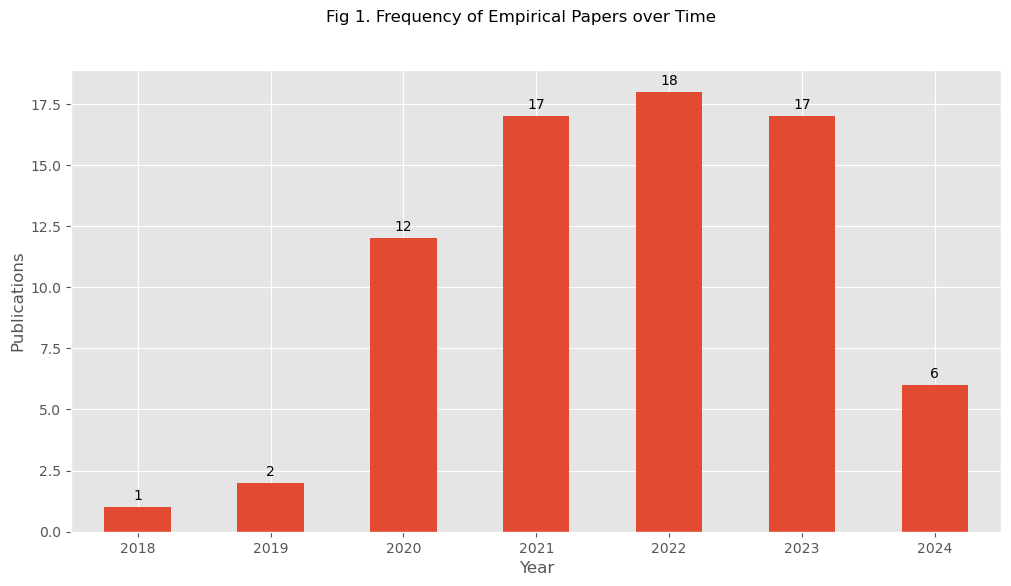

In [10]:
fig, ax = figure_1(empirical_studies, False)
fig.savefig("./figures/figure_1.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 1. Frequency of Empirical Papers over Time")

### Simulation method 

::: {.callout-note collapse="true"}
## Data notes

Hybrid M&S could be the hybridisation of simulation methods (e.g. SD+DES) or hybridisation of a simulation method with data science approach (e.g. Monte Carlo simulation + Machine learning)
:::

In [11]:
def figure_2(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """
    Create bar chart of simulation method used in studies

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    method_freq = data["method"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=method_freq, x_label="Method", y_label="Frequency"
    )

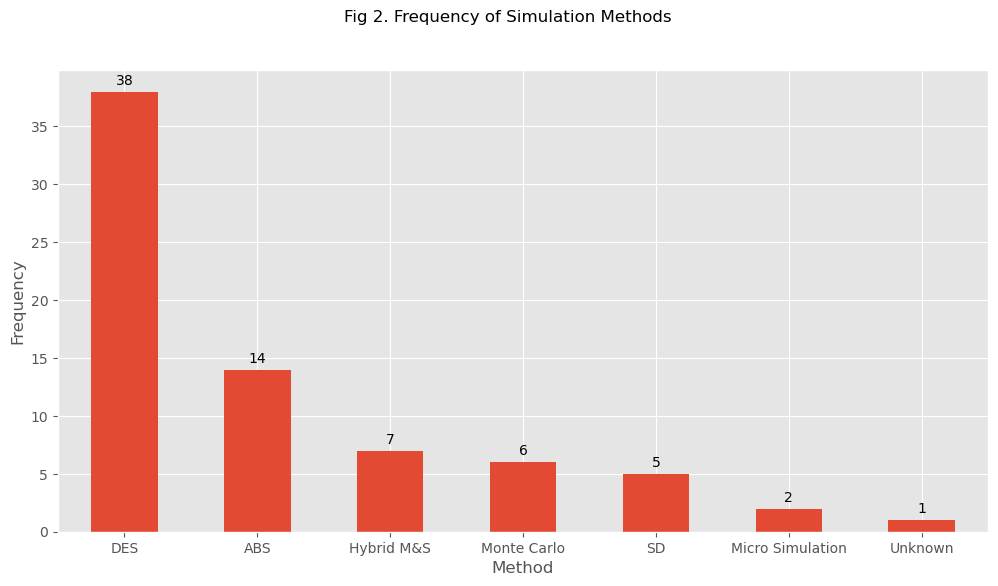

In [12]:
fig, ax = figure_2(empirical_studies, False)
fig.savefig("./figures/figure_2.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 2. Frequency of Simulation Methods")

### Application area

In [13]:
def figure_3(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """Frequency of software/coding language usage as bar chart

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    freq = data["application_area"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=freq,
        x_label="Application area",
        y_label="Frequency",
        rotate_x_ticks=90,
    )

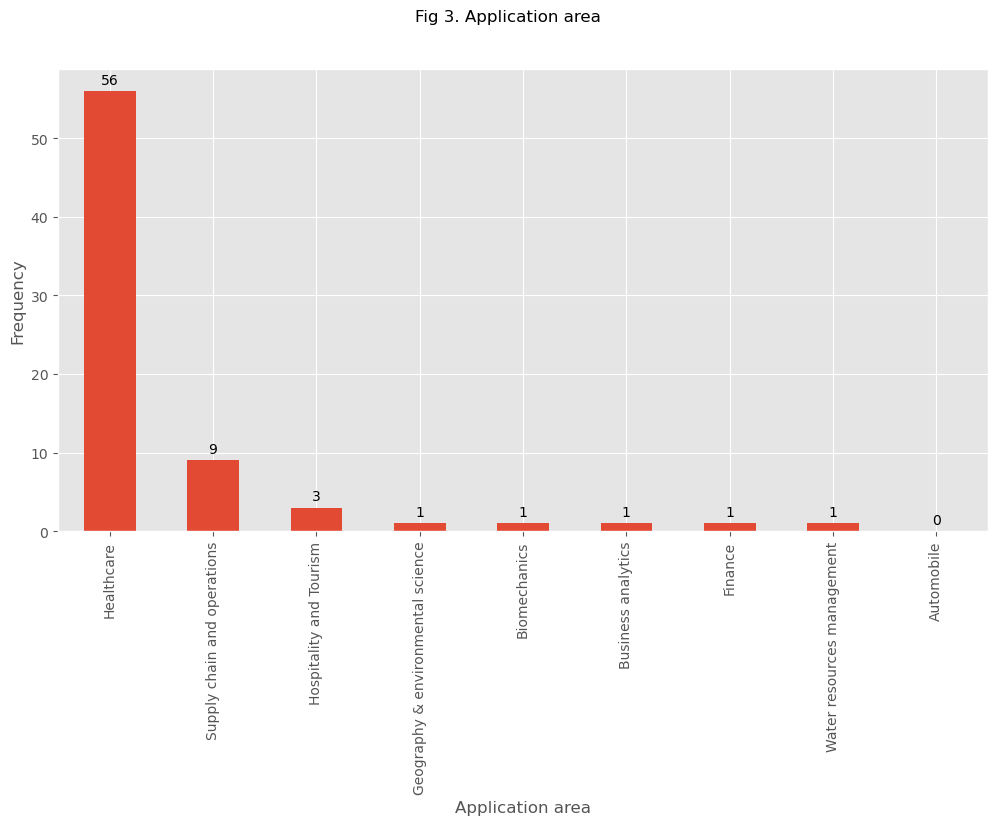

In [14]:
fig, ax = figure_3(empirical_studies, False)
fig.savefig("./figures/figure_3.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 3. Application area")

### Article Type

In [15]:
def figure_4(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """Frequency of software/coding language usage as bar chart

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    freq = data["type_of_paper"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=freq,
        x_label="Application area",
        y_label="Frequency",
        rotate_x_ticks=0,
    )

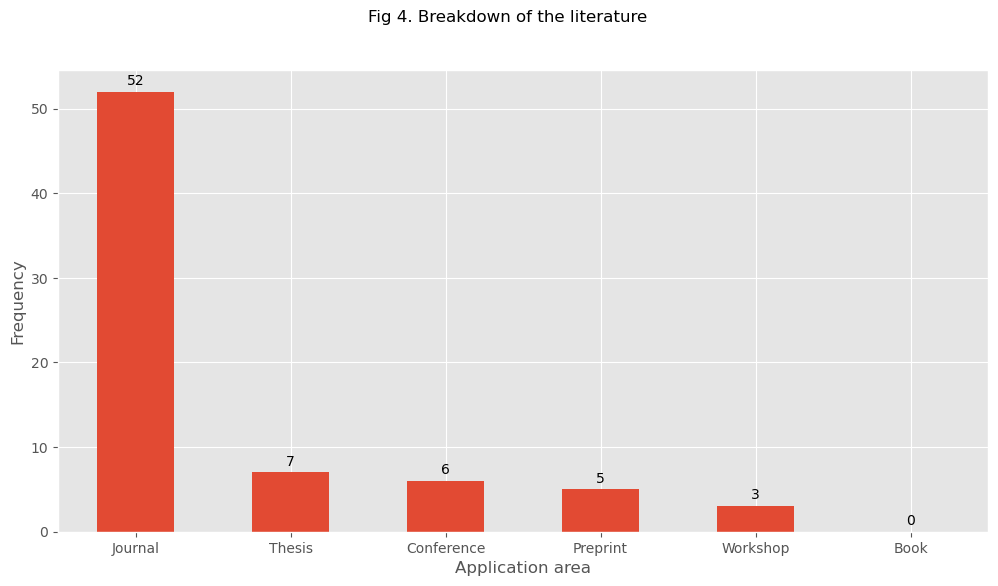

In [16]:
fig, ax = figure_4(empirical_studies, False)
fig.savefig("./figures/figure_4.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle("Fig 4. Breakdown of the literature")

### How was STRESS used?

The guideline have been listed either in main text, or in appendix. Also it might be in the form of checklist, structured (that contains the guidelines' elements with  description), and unstructured (which might contain some elements of the guideline).

In [17]:
def figure_4(data: pd.DataFrame, figsize: Optional[int | int] = (12, 6)):
    """Frequency of type of paper

    Type of papers that have used STRESS; which includes journal, conference,
    workshop, and preprints papers as well as thesis.

    Parameters:
    ---------
    data: pd.DataFrame
        The cleaned + filtered review data to plot

    figsize = Tuple(int, int)
        Size of matplotlib figure

    Returns:
    -------
    out: fig and axis of plot
    """

    freq = data["stress_implementation"].value_counts(dropna=False)

    return frequency_bar_chart(
        data=freq, x_label="Approach", y_label="Frequency", rotate_x_ticks=90
    )

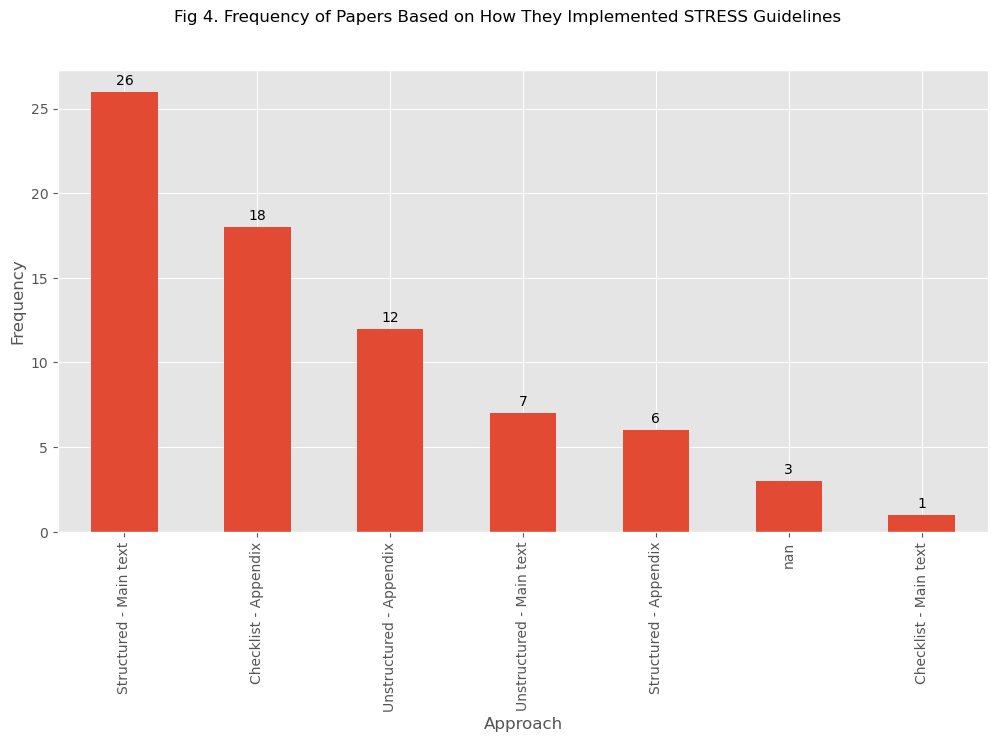

In [18]:
fig, ax = figure_4(empirical_studies, False)
fig.savefig("./figures/figure_4.png", dpi=300, bbox_inches="tight")
_ = fig.suptitle(
    "Fig 4. Frequency of Papers Based on How They Implemented STRESS Guidelines"
)

In [19]:
empirical_studies[empirical_studies["stress_implementation"].isna()]

,publication,authors,year,type_of_paper,journal,name_of_univerity,type_of_study,pre_prints,doi,used,...,stress_logic,stress_logic,stress_exp,stress_imp,stress_code,source_code_access,software,application_area,case_study,stress_implementation
No,,,,,,,,,,,,,,,,,,,,,
51,Intubation Biomechanics: Clinical Implications...,"Gadomski, Benjamin C., Bradley J. Hindman, Mit...",2021,Journal,Anesthesiology,-,Empirical,No,https://doi.org/10.1097/ALN.0000000000004024,Yes,...,NaN,NaN,NaN,NaN,NaN,No,ABAQUS,Biomechanics,Motion and spinal cord strain,NaN
64,Modelling a Computed Tomography service using ...,"Conlon, Mary, and Owen Molloy",2023,Journal,Journal of Simulation,-,Empirical - replication,No,https://doi.org/10.1080/17477778.2022.2152394,Yes,...,NaN,NaN,NaN,NaN,NaN,No,Unknown,Healthcare,Computed Tomography service,NaN
138,Network analysis of simulated and real indigen...,"Stokes, Alex",2020,Thesis,University of Southampton,University of Southampton,Master Thesis,No,https://eprints.soton.ac.uk/453033/1/Alex_Stok...,Yes,...,NaN,NaN,NaN,NaN,NaN,No,Python,Geography & environmental science,Irrigation system,NaN


In [20]:
empirical_studies["stress_implementation"].value_counts(dropna=False)

stress_implementation
Structured - Main text      26
Checklist - Appendix        18
Unstructured - Appendix     12
Unstructured - Main text     7
Structured - Appendix        6
NaN                          3
Checklist - Main text        1
Name: count, dtype: int64

### Usage by Journal/conference/other

> **TM query**: Computational Management Science appears twice? small different in raw data recording?

>  **TM query**: There are 3 univrsity of southampton and 2 Lancaster Uni publications. I think we need to double check that we are not double counting with academic journals or conference papers.

In [21]:
def unique_journal_table(data: pd.DataFrame) -> pd.DataFrame:
    '''Return a list of unique journals and their frequency
    from the pass in dataset. Assumes column called "journal" exists.

    1. Calculate frequency per journal
    2. reset_index
    3. Rename columns
    4. Create percentage column
    5. set index as "Journal" column
    '''
    table = (data["journal"].value_counts(dropna=False)
            .reset_index()
            .rename(columns={"journal": "Journal", "count": "Count"})
            .assign(Percent= lambda x: x['Count'] / len(data) * 100)
            .set_index(["Journal"])
    )
    return table

In [22]:
unique_journal_table(empirical_studies).round(1)

,Count,Percent
Journal,,
Journal of Simulation,11,15.1
Winter Simulation Conference,6,8.2
BMJ,4,5.5
University of Southampton,3,4.1
Proceedings of the Operational Research Society Simulation Workshop,3,4.1
Operations Research for Health Care,3,4.1
JAMA,2,2.7
Lancaster University,2,2.7
Healthcare,2,2.7


### Full versus partial usage of STRESS sections

In [23]:
def partial_use_of_stress(data: pd.DataFrame) -> pd.DataFrame:
    '''
    Tabularise the count and percentage of studies that made partial or full
    use of STRESS guidelines in their paper.
    '''
    table = (
        empirical_studies["partially"].value_counts()
        .reset_index()
        .rename(columns={"partially": "Partial", "count": "Count"})
        .assign(Percent= lambda x: x['Count'] / len(data) * 100)
        .set_index(["Partial"])
    )
    
    # Print the resulting DataFrame
    return table

In [24]:
partial_use_of_stress(empirical_studies).round(1)

,Count,Percent
Partial,,
Yes,45,61.6
No,25,34.2
DP,0,0.0


### Is the coded model available?

* **TM Note**: The % availability of coded models is higher in papers where authors have used STRESS when compared to the general DES in health papers (8%). Is this due a STRESS effect or because other types of study are included ABS/SD?

In [25]:
def is_coded_model_available(data: pd.DataFrame) -> pd.DataFrame:
    '''
    Tabularise if authors have made code available or not or if it available
    upon request.
    '''
    
    table = (
        data["source_code_access"].value_counts(dropna=False)
        .reset_index()
        .rename(columns={"source_code_access": "Model code available", 
                         "count": "Count"})
        .assign(Percent= lambda x: x['Count'] / len(data) * 100)
        .set_index(["Model code available"])
    )
    return table

In [26]:
is_coded_model_available(empirical_studies).round(1)

,Count,Percent
Model code available,,
No,39,53.4
Yes,23,31.5
Upon request,11,15.1


## Model availability break down by method

This shows that DES model availability percentage was ~34% (13 of 38 models). This is a higher than Monks and Harper (2023) found when they looked at the literature overall ~8%. However, far fewer studies use STRESS than don't.

Best to only consider DES and ABS due to sample sizes.

In [27]:
def filter_to_used_column(data: pd.DataFrame) -> pd.DataFrame:
    '''Pipeline helper: returns only the used column from the dataframe'''
    return data['used']

In [28]:
def total_column_first(data: pd.DataFrame) -> pd.DataFrame:
    '''Pipeline helper: returns df columns reordered to have overall/total
    column appear first'''
    sorted_columns = ['n', 'Yes', 'No', 'Upon request', 'PercentYes']
    return data[sorted_columns]

In [29]:
def model_available_by_method(data: pd.DataFrame) -> pd.DataFrame:
    '''
    Tabularise if authors have made code available split by simulation
    method
    '''    
    table = (
        data.groupby(by=['source_code_access', 'method'], observed=True)
        .count()
        .pivot_table(columns=['method'], index=['source_code_access'], 
                    observed=True)
        .fillna(value=0)
        .reset_index()
        .set_index('source_code_access')
        # drop all columns other than use
        .pipe(filter_to_used_column)
        .T.assign(n=lambda x: x.sum(axis=1),
                  PercentYes=lambda x: x['Yes'] / x['n'] * 100)
        .pipe(total_column_first)
        .astype({'n':int, 'Yes': int, 'No': int, 'Upon request': int})
    )
    return table

In [30]:
df = model_available_by_method(empirical_studies)
df.round(1)

source_code_access,n,Yes,No,Upon request,PercentYes
method,,,,,
ABS,14,2,7,5,14.3
DES,38,13,20,5,34.2
Hybrid M&S,7,2,4,1,28.6
Micro Simulation,2,1,1,0,50.0
Monte Carlo,6,2,4,0,33.3
SD,5,3,2,0,60.0
Unknown,1,0,1,0,0.0


### How many of the publications contain at least one author from STRESS 1.0?

> TM note: As finding target authors was manual we need at least one other person to repeat this process. We can then compare results.
> TM note: FA wrote some code to create this column. Need to revisit.

In [31]:
pd.DataFrame(empirical_studies['target_authors'].value_counts(dropna=False))

,count
target_authors,
No,59
Yes,14
